In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
births = pd.read_csv("D:/Desarrollo/MyLearning/R/r-basic/data/us-births.csv")

In [3]:
births.shape

(15547, 5)

In [4]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [6]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [12]:
births['decade']=10*(births['year']//10)

In [13]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [14]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [15]:
%matplotlib inline

In [16]:
import seaborn as sb
sb.set()

<Figure size 1440x2160 with 0 Axes>

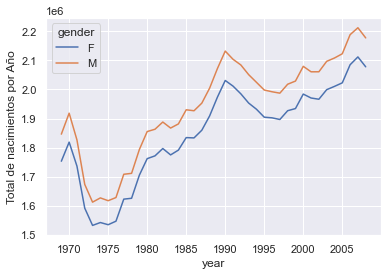

In [18]:
plt.figure(figsize=(20,30))
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel("Total de nacimientos por Año")
plt.show()

In [20]:
quartiles = np.percentile(births['births'],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [21]:
med = quartiles[1]
IQR = quartiles[2]-quartiles[0]
sig = 0.75*IQR

In [22]:
births_filter = births.query("(births > @med - 5*@sig) & (births < @med + 5*@sig)")

In [23]:
births_filter

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [25]:
births_filter['day'] = births_filter['day'].astype(int)

<ipython-input-25-9ee9708bd25c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births_filter['day'] = births_filter['day'].astype(int)


In [26]:
births_filter.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [28]:
births_filter.index = pd.to_datetime(10000*births_filter.year + 100*births_filter.month + births_filter.day,format="%Y%m%d")

In [29]:
births_filter.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [31]:
births_filter['dayofweek'] = births_filter.index.dayofweek

<ipython-input-31-fad623186bac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births_filter['dayofweek'] = births_filter.index.dayofweek


In [32]:
births_filter.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


<ipython-input-38-ce71a92f613f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['','L','M','X','J','V','S','D'])


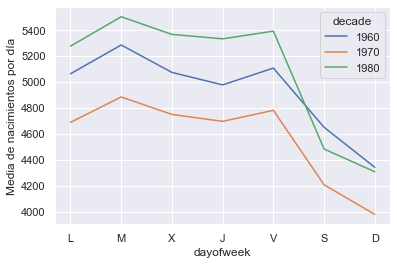

In [38]:
births_filter.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['','L','M','X','J','V','S','D'])
plt.ylabel("Media de nacimientos por día")
plt.show()

In [39]:
births_by_date = births_filter.pivot_table('births',[births_filter.index.month,births_filter.index.day],aggfunc="mean")
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [40]:
births_by_date.index = [pd.datetime(2020,month,day) for (month,day) in births_by_date.index]
births_by_date.head()

<ipython-input-40-df6db66ab669>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2020,month,day) for (month,day) in births_by_date.index]


,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 1152x288 with 0 Axes>

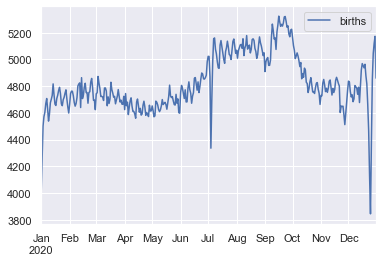

In [46]:
plt.figure(figsize=(16,4))
births_by_date.plot()
plt.show()